# iQuHack
## Author: Group 8.

In [1]:
import numpy as np
import re 
import random
import json 
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
from qiskit import *
from qiskit.circuit import gate
import pylab as plt
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
unit = QuantumCircuit(2,name='XX')
unit.ry(-np.pi/2,0)
unit.cnot(0,1)
unit.rz(np.pi/2,0)
unit.rx(np.pi/2,1)
unit.ry(np.pi/2,0)
XX = unit.to_instruction()

qr = QuantumRegister(6,'q')
circ = QuantumCircuit(qr,name='XXZ')
circ.append(XX,[qr[0],qr[1]])
circ.append(XX,[qr[1],qr[2]])
circ.append(XX,[qr[2],qr[3]])
circ.append(XX,[qr[3],qr[4]])
circ.append(XX,[qr[4],qr[5]])
circ.append(XX,[qr[5],qr[0]])
circ.append(XX,[qr[1],qr[4]])

z_coeff = 3.6/4*np.pi
circ.rz(z_coeff,0)
circ.rz(z_coeff,1)
circ.rz(z_coeff,2)
circ.rz(z_coeff,3)
circ.rz(z_coeff,4)
circ.rz(z_coeff,5)
XXZ = circ.to_instruction()

simulator = Aer.get_backend('qasm_simulator')
    

In [3]:
#code for generating random angle
col_ph=np.array([])
for i in range(250):
    z = (np.random.randn(4,4) + 1j*np.random.randn(4,4))/np.sqrt(2.0)
    q,r = np.linalg.qr(z)
    d = np.diagonal(r)
    ph = d/np.absolute(d)
    q = np.multiply(q,ph,q)
    w, v = np.linalg.eig(q)
    ph = 1j*np.log(w)
    col_ph=np.append(col_ph,[np.real(ph)])

#code for Hamming distance
def hamming_distance(str1, str2):
    """Calculate the Hamming distance between two bit strings
    Args:
        str1 (str): First string.
        str2 (str): Second string.
    Returns:
        int: Distance between strings.
    Raises:
        VisualizationError: Strings not same length
    """
    if len(str1) != len(str2):
        raise VisualizationError('Strings not same length.')
    return sum(s1 != s2 for s1, s2 in zip(str1, str2))

# For each unitary set
def CalEntropy(counts):
    entro = 0
    for keys in counts:
        for keys2 in counts:
            entro = (2**4)*((-2)**(-hamming_distance(keys,keys2)))*counts[keys]/1000*counts[keys2]/1000+entro
            if keys == keys2:
                entro = entro +(2**4)*((-2)**(-hamming_distance(keys,keys2)))*counts[keys]/1000*counts[keys2]/1000
    return entro

def CalEntropy2(counts):
    entro = 0
    for keys in counts:
        for keys2 in counts:
            entro = (2**4)*((-2)**(-hamming_distance(keys,keys2)))*counts[keys]/1000*counts[keys2]/1000+entro
    return entro

In [4]:



def GetEntropy(XXZnum,UniSetNum,subsys):
    Final_ent = [];
    for ts in range(XXZnum+1): 
        ran_result=[]
        for i in range(UniSetNum):
            testCirc = QuantumCircuit(6,6)
            for num in range(ts):
                    testCirc.append(XXZ,[qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            for jj in range(6):
                    for kk in range(3):
                        testCirc.rz(col_ph[random.randint(0,250)],jj)
                        testCirc.ry(col_ph[random.randint(0,250)],jj)
                        testCirc.rz(col_ph[random.randint(0,250)],jj)
            
            testCirc.measure(subsys, subsys)  
            job = execute(testCirc, simulator, shots=1000)
            result = job.result()
            counts = result.get_counts(testCirc)
            ran_result.append(CalEntropy2(counts))
        ent_temp = -np.log2(np.mean(ran_result))
        Final_ent.append(ent_temp)
    return Final_ent,testCirc


Trotterstep = 10
Time = np.linspace(1,Trotterstep,Trotterstep)
[AA,testC] = GetEntropy(Trotterstep,100,[0,1,2])
print(AA)
testC.draw()


[-1.1896315331341036, 1.9174809538611008, -0.6923805597189544, 1.9093628951977133, -0.22999730704058158, 1.406816905037815, 0.6184813849283829, 1.0486508141517794, 0.6941290036076173, 0.36426945343008615, 0.9552317867360339]


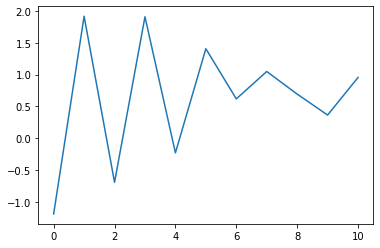

In [5]:
plt.figure()
Time = np.linspace(0,Trotterstep,Trotterstep+1)
plt.plot(Time,AA)
plt.show()

In [6]:


ran_result = [];
XXZnum = 0
for i in range(100):
    #del testCirc
    testCirc = QuantumCircuit(6,6)
    for num in range(XXZnum):
        testCirc.append(XXZ,[qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])

    for jj in range(6):
        for kk in range(2):
                
                testCirc.rz(col_ph[random.randint(0,250)],jj)
                testCirc.ry(col_ph[random.randint(0,250)],jj)
                testCirc.rz(col_ph[random.randint(0,250)],jj)
                '''
                testCirc.rx(-1/2*np.pi,jj)
                testCirc.rz(col_ph[random.randint(0,250)],jj)
                testCirc.rx(1/2*np.pi,jj)
                testCirc.rz(col_ph[random.randint(0,250)],jj)
                testCirc.rx(-1/2*np.pi,jj)
                testCirc.rz(col_ph[random.randint(0,250)],jj)
                testCirc.rx(1/2*np.pi,jj)
                testCirc.rz(col_ph[random.randint(0,250)],jj)
                '''
    #testCirc.measure([0,1,2,3], [0,1,2,3])   
    testCirc.measure([0,1,2], [0,1,2]) 
    
    job = execute(testCirc, simulator, shots=1000)
    result = job.result()
    counts = result.get_counts(testCirc)
    
    #ran_result.append(CalEntropy(counts)/2)
    ran_result.append(CalEntropy2(counts))

Final_ent = -np.log2(np.mean(ran_result))
print(Final_ent)
testCirc.draw()

-1.3429321406327297


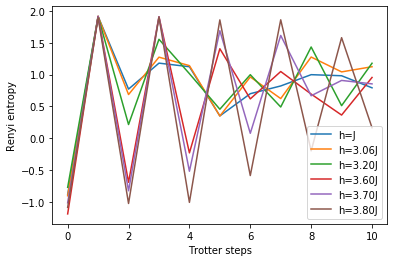

In [9]:
# [0,1,2] rot pi/4
Ent10_3uni150=[-0.8860172798900544, 1.9147145888949693, 0.7723852856325238, 1.180397470839172, 1.1240820737627273, 0.3507904931105977, 0.700107734504274, 0.8216985433904669, 0.999148484190599, 0.9821535558325302, 0.7923609850884306]
Ent10_4uni300=[-1.0095455094844097, 1.9110354195625203, 0.7094216854168109, 1.126232905636289, 1.1616282182520532, 0.3211957523880733, 0.6713827134168603, 0.9017804336259853, 1.0480638520581786, 1.0151573554043056, 0.8172342857919104]
# [0,1,2] rot 3.8*pi/4
Ent380_4uni100=[-1.0867780062181644, 1.8959287668061717, -1.025607344515169, 1.9057133319761184, -1.0082242569874873, 1.8599530710065195, -0.5866377469812831, 1.8614287525065918, -0.19821733079478251, 1.5805853743752092, 0.16516505827936132]
# [0,1,2] rot 3.06*pi/4
Ent306_3uni100=[-0.9046491770857251, 1.914167041328019, 0.6865086613011263, 1.2741504633301288, 1.1412765880600384, 0.349244556539161, 0.9631507281934986, 0.6233687452076684, 1.2763822379160772, 1.042754224172549, 1.1240944004075673]
# [0,1,2] rot 3.2*pi/4
Ent320_3uni100=[-0.7721089909533054, 1.9137514615937903, 0.2152473840383798, 1.5554119708427365, 1.0149678366539134, 0.4558045073747534, 0.9987434406274874, 0.49095614513373725, 1.4340781373253606, 0.5118860810508283, 1.178956900976491]
# [0,1,2] rot 3.7*pi/4
Ent370_3uni100=[-1.0141739305260593, 1.9113392891849037, -0.8261952051792739, 1.907567161794864, -0.5188592733734723, 1.6904397038950587, 0.07765361114715796, 1.615325580680911, 0.6678916876608947, 0.908625721978577, 0.8544570330727845]
# [0,1,2] rot 3.6*pi/4
Ent360_3uni100=[-1.1896315331341036, 1.9174809538611008, -0.6923805597189544, 1.9093628951977133, -0.22999730704058158, 1.406816905037815, 0.6184813849283829, 1.0486508141517794, 0.6941290036076173, 0.36426945343008615, 0.9552317867360339]
plt.figure()
Time = np.linspace(0,Trotterstep,Trotterstep+1)
plt.plot(Time,Ent10_3uni150)
plt.plot(Time,Ent306_3uni100)
plt.plot(Time,Ent320_3uni100)
plt.plot(Time,Ent360_3uni100)
plt.plot(Time,Ent370_3uni100)
plt.plot(Time,Ent380_4uni100)
plt.xlabel("Trotter steps")
plt.ylabel("Renyi entropy")
plt.legend(["h=J","h=3.06J","h=3.20J","h=3.60J","h=3.70J","h=3.80J"])
plt.show()

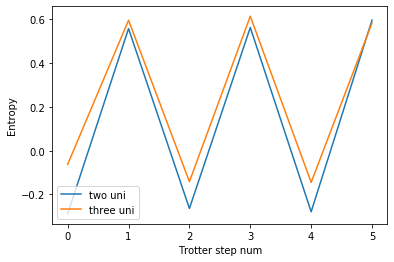

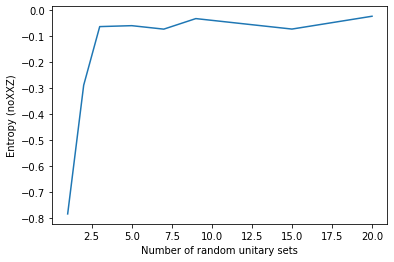

In [10]:
Ent_3uni = [-0.06239053667428131,0.5953171671817774,-0.141386520616075,0.6135766570633929,-0.14480621517532272,0.58312341850214]
Ent_2uni =[-0.2886437924602228,0.5573335961300727,-0.2638143455410868,0.5621327924000928,-0.2788404952860517,0.5958579585499063]
Ent_uni_noXXZ=[-0.7855193233482123,-0.2886437924602228,-0.06239053667428131,-0.058793280909656055,-0.07218572231390706,-0.031491483310092015,-0.07191251557414438,-0.02241129860489201]
RandSetNum=[1,2,3,5,7,9,15,20]
TrotterStep = [0,1,2,3,4,5];
plt.figure()
plt.plot(TrotterStep,Ent_2uni)
plt.plot(TrotterStep,Ent_3uni)
plt.xlabel("Trotter step num")
plt.ylabel("Entropy")
plt.legend(["two uni","three uni"])
plt.show()

plt.figure()
plt.plot(RandSetNum,Ent_uni_noXXZ)
plt.xlabel("Number of random unitary sets")
plt.ylabel("Entropy (noXXZ)")
plt.show()
